# Name: Akash Limkar
# Dataset: Customer Churn Prediction

# Import Libraries and Dataset

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [2]:
# Import Dataset

Churn_Modelling = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\DATA SCIENCE\INTERNSHIP\CODSOFT\Customer Churn Prediction\Churn_Modelling.csv")
Churn_Modelling

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Data Pre-processing or EDA

In [3]:
# change column name

Churn_Modelling.rename(columns={'Exited': 'Churn'}, inplace=True)
Churn_Modelling.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [4]:
# Removing irrelevant feature

Churn_Modelling = Churn_Modelling.drop(['RowNumber','CustomerId','Surname'],axis=1)
Churn_Modelling.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [5]:
# Check Datatypes

Churn_Modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
Churn_Modelling.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary         Churn  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [7]:
# Check Missing Values

Churn_Modelling.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

<AxesSubplot:>

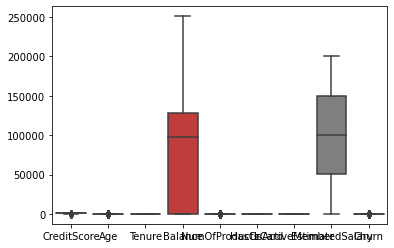

In [8]:
# Check for Outliers

sns.boxplot(data=Churn_Modelling)

# Churn (Bad) Rate Analysis

In [9]:
Churn_Modelling.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0          1               1        101348.88      1  
1          0               1        112542.58      0  
2          1               0        113931.57      1  
3          0               0         93826.63      0  
4          1               1         79084.10      0

In [10]:
Churn_Modelling.Churn.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [11]:
import plotly.express as px

fig = px.pie(Churn_Modelling,names='Churn',color='Churn',
             color_discrete_map={1:'red',
                                 0:'green'})
fig.show()

# Label Encoder

In [12]:
# Numeric columns
Churn_Modelling_num = Churn_Modelling[Churn_Modelling.select_dtypes(include=[np.number]).columns.tolist()]
Churn_Modelling_num.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Churn  
0               1        101348.88      1  
1               1        112542.58      0  
2               0        113931.57      1  
3               0         93826.63      0  
4               1         79084.10      0

In [13]:
# Category Columns
Churn_Modelling_Category = Churn_Modelling[Churn_Modelling.select_dtypes(include=['object']).columns.tolist()]
Churn_Modelling_Category.head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

In [14]:
# Apply label encoder on catergory data

Churn_Modelling_Category=Churn_Modelling_Category.apply(LabelEncoder().fit_transform)
Churn_Modelling_Category.head()

Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0

In [15]:
# Combine Label encoded data and numerical data

Churn_Modelling_combined = pd.concat([Churn_Modelling_num, Churn_Modelling_Category],axis=1)
Churn_Modelling_combined.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Churn  Geography  Gender  
0               1        101348.88      1          0       0  
1               1        112542.58      0          2       0  
2               0        113931.57      1          0       0  
3               0         93826.63      0          0       0  
4               1         79084.10      0          2       0

# Data Partition

In [16]:
x = Churn_Modelling_combined.drop(['Churn'],axis=1) # because 'Churn' is dependent value
y = Churn_Modelling_combined[['Churn']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

# Model Building

# 1) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression().fit(X_train, y_train)

C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Train

In [18]:
y_train.reset_index(drop=True, inplace=True)

In [19]:
X_train.reset_index(drop=True, inplace=True)

In [20]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          686   32       6       0.00              2          1   
1          681   32       3  148884.47              2          1   
2          837   38       2       0.00              2          1   
3          727   49       7   96296.78              1          1   
4          755   38       1       0.00              2          1   

   IsActiveMember  EstimatedSalary  Geography  Gender  Churn  
0               1        179093.26          0       1      0  
1               1         90967.37          0       1      0  
2               1         46395.21          0       0      0  
3               0        190457.87          2       0      1  
4               0         20734.81          0       0      0

In [21]:
# prediction

train['PredictedChurn']=logreg.predict(X_train) #logreg conatins applied classifier
train.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          686   32       6       0.00              2          1   
1          681   32       3  148884.47              2          1   
2          837   38       2       0.00              2          1   
3          727   49       7   96296.78              1          1   
4          755   38       1       0.00              2          1   

   IsActiveMember  EstimatedSalary  Geography  Gender  Churn  PredictedChurn  
0               1        179093.26          0       1      0               0  
1               1         90967.37          0       1      0               0  
2               1         46395.21          0       0      0               0  
3               0        190457.87          2       0      1               0  
4               0         20734.81          0       0      0               0

# Classification report of train 

In [22]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'],train['PredictedChurn']))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5572
           1       0.40      0.06      0.10      1428

    accuracy                           0.79      7000
   macro avg       0.60      0.52      0.49      7000
weighted avg       0.72      0.79      0.72      7000



# Test

In [23]:
y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [24]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          724   54       8  172192.49              1          1   
1          732   25       0  110942.90              1          0   
2          798   28       3       0.00              2          1   
3          601   49       4   96252.98              2          1   
4          654   36       2       0.00              2          1   

   IsActiveMember  EstimatedSalary  Geography  Gender  Churn  
0               1        136902.01          1       1      0  
1               0        172576.56          0       1      0  
2               0          2305.27          0       1      0  
3               0        104263.82          1       0      0  
4               1        146652.11          2       0      0

In [25]:
# prediction 

test['PredictedChurn']=logreg.predict(X_test)
test.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          724   54       8  172192.49              1          1   
1          732   25       0  110942.90              1          0   
2          798   28       3       0.00              2          1   
3          601   49       4   96252.98              2          1   
4          654   36       2       0.00              2          1   

   IsActiveMember  EstimatedSalary  Geography  Gender  Churn  PredictedChurn  
0               1        136902.01          1       1      0               0  
1               0        172576.56          0       1      0               0  
2               0          2305.27          0       1      0               0  
3               0        104263.82          1       0      0               0  
4               1        146652.11          2       0      0               0

# Classification report of test

In [26]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'],test['PredictedChurn']))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2391
           1       0.38      0.06      0.10       609

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.49      3000
weighted avg       0.72      0.79      0.72      3000



# Save trained model to a pickle file

In [27]:
import pickle

with open(r"C:\Users\akash\OneDrive\Desktop\DATA SCIENCE\INTERNSHIP\CODSOFT\Customer Churn Prediction\Logistic_churn.pkl", 'wb') as file:
    pickle.dump(logreg, file)

# 2) Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

RFC = RandomForestClassifier(n_estimators=20, # n_estimators = number tree we want 
                               criterion="gini",
                               max_depth=4,  # branches
                               min_samples_split=100,# eparent node
                               min_samples_leaf=50,# Child node
                               max_features="sqrt") 

RFC.fit(X_train, y_train)

C:\Users\akash\AppData\Local\Temp\ipykernel_24440\1420529396.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

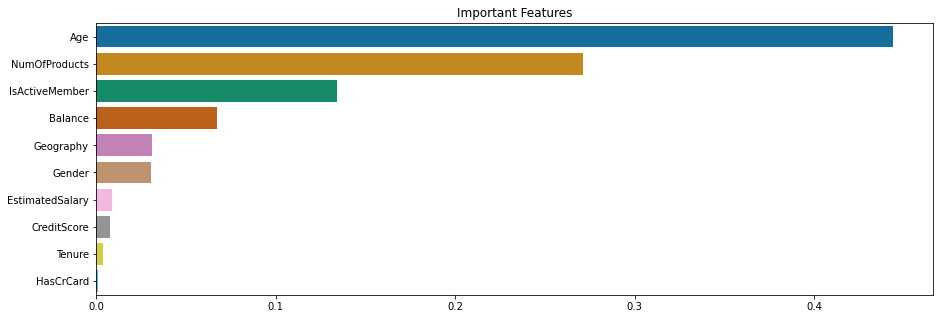

In [29]:
# Important features

import matplotlib.pyplot as plt

imp_feature = pd.Series(data=RFC.feature_importances_, index=RFC.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.title("Important Features")
ax = sns.barplot(y=imp_feature.index, x=imp_feature.values, palette="colorblind", orient='h')

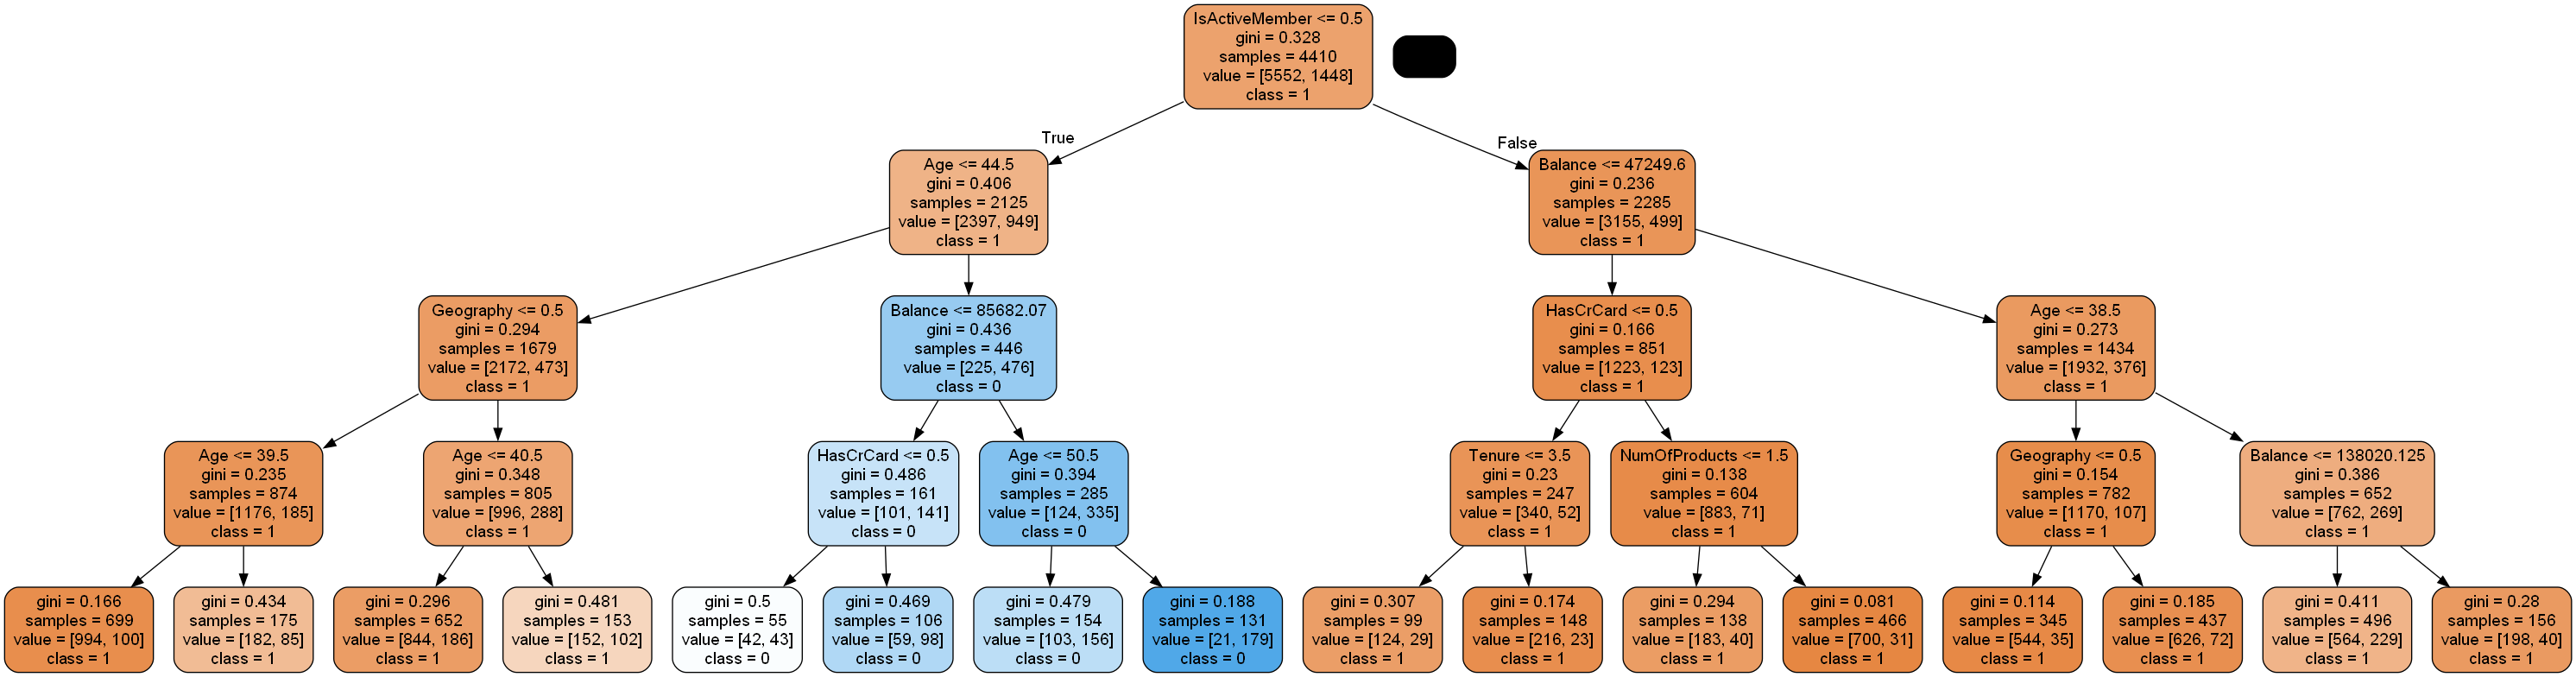

In [30]:
# Visual of Random Forest

from sklearn.tree import export_graphviz
import pydot

tree = RFC.estimators_[2]  # Number of trees   
Churn=['1','0'] 
feature_list = list(x.columns)  # x is used in data partition

export_graphviz(tree, out_file = 'churn_RF.dot', 
                feature_names = feature_list, 
                class_names = Churn,
                rounded = True, 
                filled=True)

# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('churn_RF.dot')

from IPython.display import Image
graph.write_png('tree.png')
Image(filename = 'tree.png')

# Train

In [31]:
# Prediction on Train

train['PredictedChurn']=RFC.predict(X_train)
train.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          686   32       6       0.00              2          1   
1          681   32       3  148884.47              2          1   
2          837   38       2       0.00              2          1   
3          727   49       7   96296.78              1          1   
4          755   38       1       0.00              2          1   

   IsActiveMember  EstimatedSalary  Geography  Gender  Churn  PredictedChurn  
0               1        179093.26          0       1      0               0  
1               1         90967.37          0       1      0               0  
2               1         46395.21          0       0      0               0  
3               0        190457.87          2       0      1               1  
4               0         20734.81          0       0      0               0

# Classification report of train 

In [32]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['PredictedChurn']))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5572
           1       0.90      0.18      0.31      1428

    accuracy                           0.83      7000
   macro avg       0.86      0.59      0.60      7000
weighted avg       0.84      0.83      0.78      7000



# Test

In [33]:
# prediction on test

test['PredictedChurn']=RFC.predict(X_test)
test.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          724   54       8  172192.49              1          1   
1          732   25       0  110942.90              1          0   
2          798   28       3       0.00              2          1   
3          601   49       4   96252.98              2          1   
4          654   36       2       0.00              2          1   

   IsActiveMember  EstimatedSalary  Geography  Gender  Churn  PredictedChurn  
0               1        136902.01          1       1      0               0  
1               0        172576.56          0       1      0               0  
2               0          2305.27          0       1      0               0  
3               0        104263.82          1       0      0               0  
4               1        146652.11          2       0      0               0

# Classification report of test

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['PredictedChurn']))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2391
           1       0.88      0.20      0.33       609

    accuracy                           0.83      3000
   macro avg       0.86      0.60      0.62      3000
weighted avg       0.84      0.83      0.79      3000



# Save trained model to a pickle file

In [35]:
import pickle

with open(r"C:\Users\akash\OneDrive\Desktop\DATA SCIENCE\INTERNSHIP\CODSOFT\Customer Churn Prediction\RandomForest_churn.pkl", 'wb') as file:
    pickle.dump(RFC, file)

# 3) Gradient Boosting

In [36]:
# Define Model parameters to tune

model_parameters = {'n_estimators': [3,4,5], #n_estimators = number of boosting stages
                    'max_depth':    [3, 4],      # maximum branches in tree
                    'learning_rate':[0.7, 0.8],
                    'min_samples_leaf':[100,200,300], #child
                    'min_samples_split':[50,70,90]} #parent 

In [37]:
# Gridsearch the parameters to find the best parameters.

model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse") #the random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


C:\Users\akash\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\akash\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\akash\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\akash\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\akash\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecat

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.8], 'max_depth': [3, 4],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [50, 70, 90],
                         'n_estimators': [3, 4, 5]},
             scoring='accuracy', verbose=1)

In [38]:
print('Best parameters are', gscv_GBM.best_params_)

Best parameters are {'learning_rate': 0.8, 'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 4}


In [39]:
# Re-fit the model with the best parameters

GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
GBM.fit(X_train, y_train)

C:\Users\akash\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier(learning_rate=0.8, max_depth=4, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=4)

# Gradient Boosting Tree

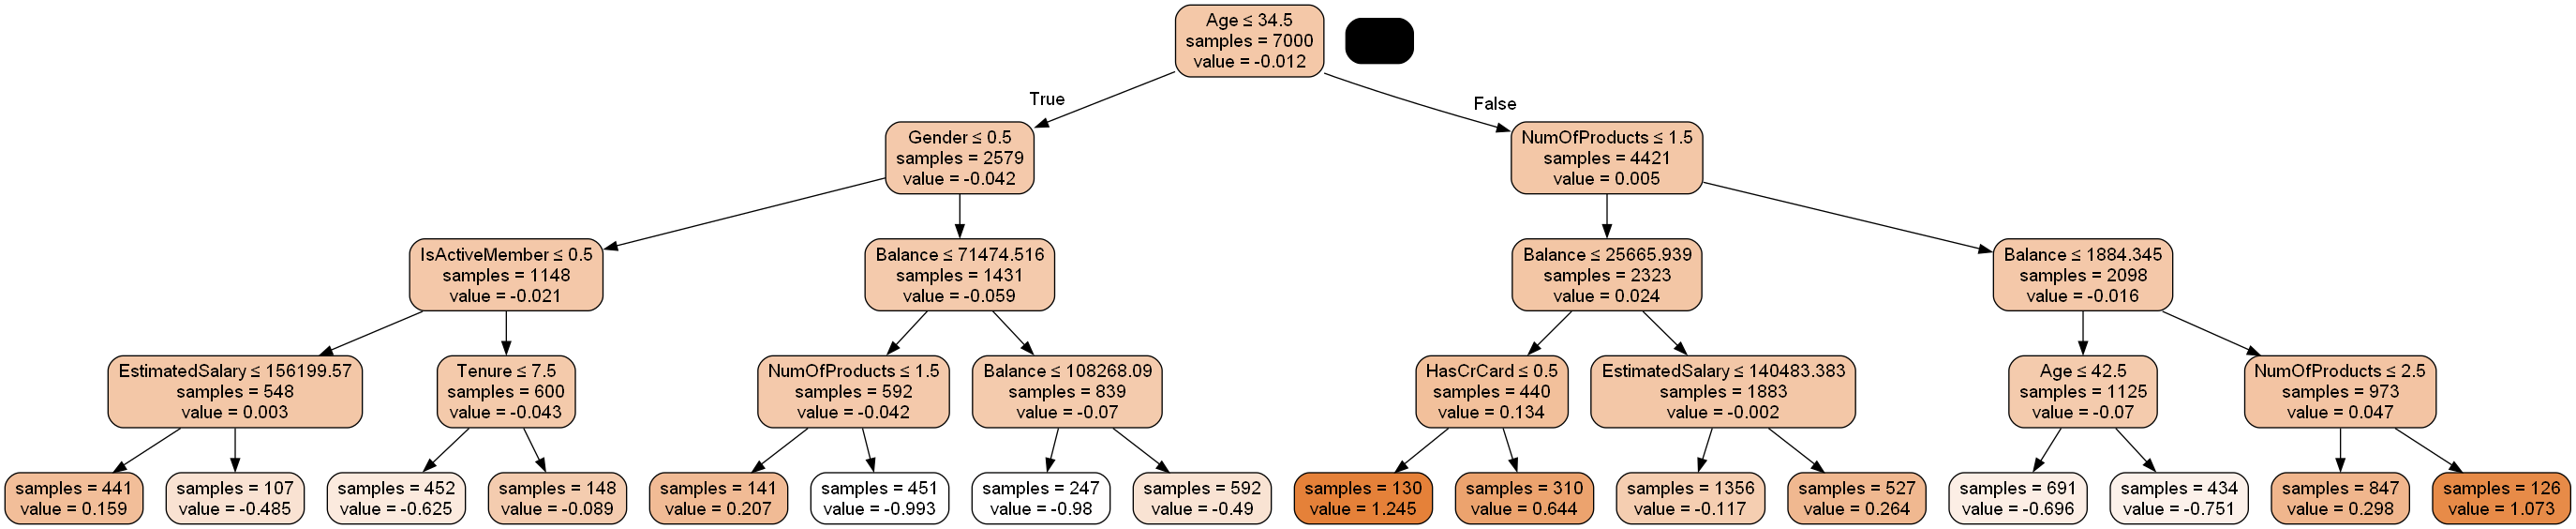

In [40]:
from sklearn.tree import export_graphviz
sub_tree = GBM.estimators_[2, 0] #0 to 99 
churn=[1,0]
feature_list = list(x.columns)

# Visualization
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Churn,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Prediction Train

In [41]:
train_pred = GBM.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# Classification Report Train

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5572
           1       0.77      0.46      0.57      1428

    accuracy                           0.86      7000
   macro avg       0.82      0.71      0.74      7000
weighted avg       0.85      0.86      0.85      7000



# Prediction Test

In [43]:
test_pred = GBM.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Classification Report Test

In [44]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2391
           1       0.77      0.45      0.57       609

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



# Save trained model to a pickle file

In [45]:
import pickle

with open(r"C:\Users\akash\OneDrive\Desktop\DATA SCIENCE\INTERNSHIP\CODSOFT\Customer Churn Prediction\GBM_churn.pkl", 'wb') as file:
    pickle.dump(GBM, file)

# *** Comparing Models of Logistic regression, Random forest and Gradient Boosting

Accuracy of Models

    * Logistic Regression = Train:79%, Test:79%
    
    * Random Forest = Train:83%, Test:83%
    
    * Gradient Boosting = Train:86%, Test:86%